<a href="https://colab.research.google.com/github/DAUN3046/news_wordcloud/blob/main/%EB%89%B4%EC%8A%A4_5%EA%B0%9C%EB%85%84_wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 불러오기
## 라이브러리 설치

In [ ]:
import pandas as pd

## 드라이브 마운트

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


## 데이터 읽기

In [ ]:
df_2018 = pd.read_excel('/content/gdrive/MyDrive/newsdata/2018-it.xlsx')
df_2019 = pd.read_excel('/content/gdrive/MyDrive/newsdata/2019-it.xlsx')
df_2020 = pd.read_excel('/content/gdrive/MyDrive/newsdata/2020-it.xlsx')
df_2021 = pd.read_excel('/content/gdrive/MyDrive/newsdata/2021-it.xlsx')
df_2022 = pd.read_excel('/content/gdrive/MyDrive/newsdata/2022-it.xlsx')

## 데이터 확인

In [ ]:
df_2022.head()

,Unnamed: 0,date,title,source,contents,link
0,0,18시간 전,메타버스 시대를 선도하는 IT전문기업 ㈜인터포,강원일보,"지역 인재 육성, 지역 경제 발전에 이바지하고 싶다” 고 포부를 밝혔다. ◇ 조용만...",http://www.kwnews.co.kr/page/view/202212151742...
1,1,1일 전,"정상원 이스트소프트 대표 ""IT기업 '신발 속 돌멩이' 치울 것""",한국경제,“국내 정보기술(IT) 기업들의 신발 속 돌멩이를 치우는 역할을 하겠습니다.” 한국...,https://www.hankyung.com/it/article/2022121840191
2,2,5일 전,"추경호 ""IT산업 다음은 신성장 4.0 전략""",매일신문언론사 선정,"신성장 4.0 전략은 농업 중심의 성장 1.0, 제조업 중심의 2.0, IT산업 중...",https://news.imaeil.com/page/view/202212141323...
3,3,3일 전,위기 경영에서 화장실 휴지를 없앤 이유 [최연진의 IT 프리즘],한국일보언론사 선정,흔히 '경제는 심리'라고 한다. 사람들은 '경기가 안 좋다'는 말을 들으면 미래에 ...,https://hankookilbo.com/News/Read/A20221216104...
4,4,2022.12.09.,국적 세탁 北 IT인력 잠입 주의보,서울신문언론사 선정,정보기술(IT) 기업들을 상대로 국적·신분을 위장한 북한 인력을 고용하는 일이 없도...,https://www.seoul.co.kr/news/newsView.php?id=2...


# 전처리

## 환경 세팅

In [ ]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists...
Reading package lists...
Building dependency tree...
Rea

In [ ]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [ ]:
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /tmp/mecab-python-0.996
  Created wheel for mecab-python: filename=mecab_python-0.996_ko_0.9.2-cp38-cp38-linux_x86_64.whl size=142131 sha256=bfae03214c3366bd0c9fec3056abf7b882f8c143655c4bb9b0fd0e13bbf56865
  Stored in directory: /root/.cache/pip/wheels/e3/88/e7/a947778cce3c142d5721c0629e05db7b09979d3a973277ec2f
Failed to build mecab-python
  Attempting uninstall: mecab-python
    Found existing installation: mecab-python 0.996-ko-0.9.2
    Uninstalling mecab-python-0.996-ko-0.9.2:
      Successfully uninstalled mecab-python-0.996-ko-0.9.2
    Running setup.py install for mecab-python: started
    Running setup.py install for mecab-python: finished with status 'done'


  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  DEPRECATION: mecab-python was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. You can find discussion regarding this at https://github.com/pypa/pip/issues/8368.


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
import numpy as np

In [ ]:
import re

In [ ]:
text_2018 = list()
text_2019 = list()
text_2020 = list()
text_2021 = list()
text_2022 = list()

## 사용할 컬럼만 추출

In [ ]:
df_2018_result = df_2018['title']
df_2019_result = df_2019['title']
df_2020_result = df_2020['title']
df_2021_result = df_2021['title']
df_2022_result = df_2022['title']

## 괄호 문자 제거
기사 제목의 [] 괄호 안에 필요 없는 말이 단어가 들어가 있는 경우가 많으므로 제거한다.

In [ ]:
regex="\[.*\]|\s-\s.*"

In [ ]:
for i in range(len(df_2018_result)):
  df_2018_result[i] = re.sub(regex, '', df_2018_result[i])
for i in range(len(df_2019_result)):
  df_2019_result[i] = re.sub(regex, '', df_2019_result[i])
for i in range(len(df_2020_result)):
  df_2020_result[i] = re.sub(regex, '', df_2020_result[i])
for i in range(len(df_2021_result)):
  df_2021_result[i] = re.sub(regex, '', df_2021_result[i])
for i in range(len(df_2022_result)):
  df_2022_result[i] = re.sub(regex, '', df_2022_result[i])

<ipython-input-20-c480aab715eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018_result[i] = re.sub(regex, '', df_2018_result[i])
<ipython-input-20-c480aab715eb>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_result[i] = re.sub(regex, '', df_2022_result[i])


## 토큰화

### 형태소 분리

In [ ]:
okt = Okt()

In [ ]:
for i in range(len(df_2018)):
  text_2018 += okt.nouns(str(df_2018_result[i]))

In [ ]:
for i in range(len(df_2019)):
  text_2019 += okt.nouns(str(df_2019_result[i]))
for i in range(len(df_2020)):
  text_2020 += okt.nouns(str(df_2020_result[i]))
for i in range(len(df_2021)):
  text_2021 += okt.nouns(str(df_2021_result[i]))
for i in range(len(df_2022)):
  text_2022 += okt.nouns(str(df_2022_result[i]))

### 키워드 뽑기

In [ ]:
counts_2018 = Counter(text_2018)
tags_2018 = counts_2018.most_common(200) # 넉넉히 잡아서 솎아내기 위해 200개 뽑음
counts_2019 = Counter(text_2019)
tags_2019 = counts_2019.most_common(200)
counts_2020 = Counter(text_2020)
tags_2020 = counts_2020.most_common(200)
counts_2021 = Counter(text_2021)
tags_2021 = counts_2021.most_common(200)
counts_2022 = Counter(text_2022)
tags_2022 = counts_2022.most_common(200)

In [ ]:
tags_2018

[('기업', 301),
 ('삼성', 199),
 ('전자', 148),
 ('기술', 134),
 ('한국', 123),
 ('글로벌', 109),
 ('시장', 109),
 ('혁신', 97),
 ('등', 96),
 ('산업', 96),
 ('금융', 95),
 ('공룡', 92),
 ('업계', 92),
 ('사업', 84),
 ('로', 83),
 ('서비스', 81),
 ('투자', 79),
 ('내년', 77),
 ('주', 76),
 ('대표', 73),
 ('디지털', 71),
 ('구글', 68),
 ('차', 66),
 ('미래', 65),
 ('개발', 65),
 ('클라우드', 64),
 ('시대', 62),
 ('규제', 62),
 ('스마트', 62),
 ('위', 61),
 ('인재', 61),
 ('세계', 59),
 ('체인', 58),
 ('블록', 57),
 ('중국', 54),
 ('그룹', 53),
 ('반도체', 52),
 ('것', 50),
 ('국내', 49),
 ('바이오', 48),
 ('해외', 47),
 ('테크', 47),
 ('로봇', 46),
 ('실적', 46),
 ('교육', 46),
 ('시스템', 43),
 ('제', 42),
 ('사', 42),
 ('애플', 42),
 ('경쟁', 41),
 ('의료', 41),
 ('명', 41),
 ('더', 41),
 ('전쟁', 41),
 ('자율', 40),
 ('첫', 40),
 ('데이터', 40),
 ('증시', 39),
 ('도입', 39),
 ('플랫폼', 38),
 ('코리아', 38),
 ('세', 38),
 ('산업혁명', 38),
 ('은행', 37),
 ('게임', 37),
 ('통신', 36),
 ('성장', 36),
 ('아마존', 36),
 ('융합', 36),
 ('업체', 35),
 ('정부', 35),
 ('확대', 35),
 ('무역', 35),
 ('활용', 35),
 ('지원', 35),
 ('보안', 35),
 (

### 태그 수정
전치사, 관련 없는 단어 등을 솎아준다.

In [ ]:
tags_2018 = [('기술', 134),
 ('글로벌', 109),
 ('시장', 109),
 ('혁신', 97),
 ('산업', 96),
 ('금융', 95),
 ('업계', 92),
 ('사업', 84),
 ('서비스', 81),
 ('투자', 79),
 ('내년', 77),
 ('대표', 73),
 ('디지털', 71),
 ('구글', 68),
 ('차', 66),
 ('미래', 65),
 ('개발', 65),
 ('클라우드', 64),
 ('시대', 62),
 ('규제', 62),
 ('스마트', 62),
 ('인재', 61),
 ('세계', 59),
 ('블록체인', 57),
 ('중국', 54),
 ('그룹', 53),
 ('반도체', 52),
 ('국내', 49),
 ('바이오', 48),
 ('해외', 47),
 ('테크', 47),
 ('로봇', 46),
 ('실적', 46),
 ('교육', 46),
 ('시스템', 43),
 ('애플', 42),
 ('경쟁', 41),
 ('의료', 41),
 ('전쟁', 41),
 ('자율', 40),
 ('데이터', 40),
 ('증시', 39),
 ('도입', 39),
 ('플랫폼', 38),
 ('산업혁명', 38),
 ('은행', 37),
 ('게임', 37),
 ('통신', 36),
 ('성장', 36),
 ('아마존', 36),
 ('융합', 36),
 ('정부', 35),
 ('확대', 35),
 ('무역', 35),
 ('보안', 35),
 ('화웨이', 34),
 ('전략', 33),
 ('부품', 32),
 ('핀', 32),
 ('현대', 31),
 ('카카오', 31),
 ('펀드', 31),
 ('스마트폰', 30),
 ('고객', 30),
 ('택시', 30),
 ('코스닥', 30),
 ('협력', 30),
 ('정보', 30),
 ('롯데', 30),
 ('카풀', 29),
 ('인프라', 28),
 ('스타트업', 28),
 ('지능', 28),
 ('정책', 28),
 ('미국', 28),
 ('솔루션', 27),
 ('인력', 27),
 ('결제', 26),
 ('첨단', 26),
 ('수출', 25),
 ('창업', 25),
 ('네이버', 25),
 ('대형', 24),
 ('헬스케어', 24),
 ('강화', 24),
 ('외국인', 24),
 ('인공', 24),
 ('현대차', 24),
 ('상장', 22),
 ('인터넷', 22),
 ('전문가', 22),
 ('여성', 22),
 ('양성', 22),
 ('소프트웨어', 22),
 ('강국', 22),
 ('기기', 21),
 ('콘텐츠', 21),
 ('업종', 21),
 ('위기', 21),
 ('속도', 21),
 ('센터', 20),
 ('코스피', 20),
 ('기업인', 20),
 ('직원', 20),
 ('인도', 20),
 ('청년', 20),
 ('공유', 20),
 ('세대', 20),
 ('핵심', 20),
 ('주행', 20),
 ('영업', 20),
 ('추진', 20),
 ('법', 20),
 ('앱', 20),
 ('구축', 20),
 ('빅데이터', 20),
 ('통합', 20),
 ('탄력', 20),
 ('인수', 19),
 ('건설', 19),
 ('모바일', 19),
 ('거래', 19),
 ('유통', 19),
 ('페북', 19),
 ('도전', 19),
 ('접목', 19),
 ('기반', 19),
 ('선택', 19),
 ('경영', 19),
 ('일자리', 19),
 ('하나', 18),
 ('경쟁력', 18),
 ('사람', 18),
 ('채용', 18),
 ('승부', 18),
 ('사회', 18)]

In [ ]:
tags_2019 = [('기술', 153),
 ('글로벌', 145),
 ('혁신', 120),
 ('디지털', 116),
 ('시장', 109),
 ('금융', 99),
 ('산업', 97),
 ('서비스', 92),
 ('투자', 86),
 ('사업', 78),
 ('미래', 78),
 ('개발', 72),
 ('업계', 71),
 ('시스템', 71),
 ('반도체', 70),
 ('클라우드', 69),
 ('구글', 68),
 ('대표', 61),
 ('로봇', 58),
 ('테크', 58),
 ('교육', 58),
 ('플랫폼', 57),
 ('규제', 57),
 ('시대', 56),
 ('인재', 56),
 ('성장', 54),
 ('스타트업', 52),
 ('정부', 52),
 ('그룹', 50),
 ('솔루션', 47),
 ('데이터', 47),
 ('경제', 46),
 ('협력', 46),
 ('무역', 46),
 ('전략', 44),
 ('수출', 44),
 ('카카오', 42),
 ('해외', 42),
 ('융합', 41),
 ('전쟁', 41),
 ('바이오', 39),
 ('스마트', 39),
 ('중국', 38),
 ('보안', 38),
 ('은행', 37),
 ('인프라', 36),
 ('센터', 36),
 ('경쟁', 35),
 ('게임', 35),
 ('강국', 35),
 ('지능', 34),
 ('직업', 32),
 ('창업', 32),
 ('의료', 32),
 ('부품', 31),
 ('정보', 31),
 ('통합', 31),
 ('아마존', 30),
 ('화웨이', 30),
 ('도입', 29),
 ('애플', 29),
 ('네이버', 29),
 ('코스피', 29),
 ('산업혁명', 29),
 ('경영', 29)]

In [ ]:
tags_2020

[('기업', 279),
 ('코로나', 233),
 ('삼성', 192),
 ('디지털', 145),
 ('기술', 133),
 ('금융', 125),
 ('시장', 107),
 ('전자', 106),
 ('공룡', 103),
 ('한국', 103),
 ('혁신', 100),
 ('시대', 97),
 ('산업', 96),
 ('글로벌', 93),
 ('사업', 92),
 ('플랫폼', 91),
 ('투자', 90),
 ('업계', 88),
 ('등', 82),
 ('로', 81),
 ('서비스', 77),
 ('데이터', 76),
 ('반도체', 75),
 ('미래', 73),
 ('테크', 70),
 ('내년', 68),
 ('세계', 67),
 ('위', 63),
 ('구글', 63),
 ('클라우드', 62),
 ('네이버', 59),
 ('인재', 59),
 ('대표', 59),
 ('카카오', 51),
 ('성장', 51),
 ('시스템', 50),
 ('지원', 50),
 ('솔루션', 50),
 ('개발', 50),
 ('펀드', 49),
 ('스마트', 49),
 ('사', 49),
 ('독점', 49),
 ('규제', 48),
 ('더', 48),
 ('첫', 47),
 ('교육', 46),
 ('증시', 45),
 ('온라인', 45),
 ('로봇', 44),
 ('전환', 44),
 ('그룹', 43),
 ('정부', 43),
 ('빅', 43),
 ('인사', 43),
 ('앱', 41),
 ('것', 41),
 ('경제', 40),
 ('관리', 40),
 ('수출', 40),
 ('주목', 39),
 ('은행', 39),
 ('바이오', 38),
 ('보안', 38),
 ('애플', 38),
 ('차', 37),
 ('해외', 37),
 ('최대', 36),
 ('국내', 36),
 ('비대', 36),
 ('게임', 35),
 ('의', 35),
 ('최고', 35),
 ('스타트업', 34),
 ('속', 34),
 ('백신', 

In [ ]:
tags_2020 = [('코로나', 233),
 ('디지털', 145),
 ('기술', 133),
 ('금융', 125),
 ('시장', 107),
 ('혁신', 100),
 ('시대', 97),
 ('산업', 96),
 ('글로벌', 93),
 ('사업', 92),
 ('플랫폼', 91),
 ('투자', 90),
 ('업계', 88),
 ('서비스', 77),
 ('데이터', 76),
 ('반도체', 75),
 ('미래', 73),
 ('테크', 70),
 ('세계', 67),
 ('구글', 63),
 ('클라우드', 62),
 ('네이버', 59),
 ('인재', 59),
 ('대표', 59),
 ('카카오', 51),
 ('성장', 51),
 ('시스템', 50),
 ('솔루션', 50),
 ('개발', 50),
 ('펀드', 49),
 ('스마트', 49),
 ('독점', 49),
 ('규제', 48),
 ('교육', 46),
 ('증시', 45),
 ('온라인', 45),
 ('로봇', 44),
 ('전환', 44),
 ('그룹', 43),
 ('정부', 43),
 ('빅', 43),
 ('앱', 41),
 ('경제', 40),
 ('수출', 40),
 ('은행', 39),
 ('바이오', 38),
 ('보안', 38),
 ('애플', 38),
 ('차', 37),
 ('해외', 37),
 ('국내', 36),
 ('비대면', 36),
 ('게임', 35),
 ('최고', 35),
 ('스타트업', 34),
 ('백신', 34),
 ('실적', 33),
 ('인프라', 33),
 ('언택트', 33),
 ('전략', 33),
 ('법', 32),
 ('매출', 32),
 ('위기', 31),
 ('인력', 31),
 ('융합', 31),
 ('센터', 30),
 ('기반', 30),
 ('강화', 30),
 ('구축', 29),
 ('주식', 29),
 ('경쟁', 29),
 ('협력', 29),
 ('기기', 28),
 ('도전', 28),
 ('취업', 28),
 ('전문가', 27),
 ('중국', 27),
 ('첨단', 27),
 ('경영', 27),
 ('가전', 26),
 ('전쟁', 26),
 ('업체', 26),
 ('뉴딜', 26),
 ('이재용', 26),
 ('채용', 25),
 ('코스피', 25),
 ('핀테크', 25),
 ('문화', 25),
 ('강국', 25),
 ('속도', 25),
 ('통신', 25),
 ('미국', 25),
 ('차세대', 24),
 ('의료', 24),
 ('정보', 24),
 ('재택근무', 24),
 ('안정', 24),
 ('헬스케어', 23),
 ('전기', 23),
 ('증권', 23),
 ('여성', 23),
 ('배달', 23),
 ('청년', 23),
 ('유통', 23),
 ('고객', 21),
 ('핵심', 21),
 ('창업', 21),
 ('선도', 20),
 ('대기업', 20),
 ('바이든', 20),
 ('통합', 19),
 ('미래에셋', 19),
 ('대응', 19),
 ('집중', 19),
 ('공공', 19),
 ('양성', 19),
 ('페북', 19),
 ('자율', 19),
 ('대비', 19),
 ('방역', 19),
 ('수익률', 18),
 ('현대차', 18),
 ('포스트', 18),
 ('전기차', 18),
 ('접목', 17),
 ('출시', 17),
 ('기대', 17),
 ('전문', 17)]

In [ ]:
tags_2021

[('기업', 310),
 ('삼성', 210),
 ('기술', 131),
 ('디지털', 121),
 ('업계', 120),
 ('사업', 111),
 ('서비스', 104),
 ('혁신', 99),
 ('인재', 99),
 ('금융', 97),
 ('전자', 94),
 ('한국', 92),
 ('투자', 90),
 ('산업', 85),
 ('내년', 82),
 ('글로벌', 81),
 ('반도체', 79),
 ('메타', 79),
 ('버스', 77),
 ('미래', 74),
 ('플랫폼', 74),
 ('개발자', 71),
 ('등', 70),
 ('개발', 68),
 ('시장', 67),
 ('공룡', 65),
 ('로', 65),
 ('인력', 64),
 ('테크', 62),
 ('스타트업', 62),
 ('코로나', 61),
 ('명', 61),
 ('대표', 60),
 ('지원', 60),
 ('클라우드', 59),
 ('더', 59),
 ('카카오', 59),
 ('교육', 58),
 ('데이터', 57),
 ('네이버', 57),
 ('위', 54),
 ('시대', 53),
 ('세계', 53),
 ('채용', 52),
 ('시스템', 52),
 ('전환', 48),
 ('그룹', 48),
 ('국내', 46),
 ('규제', 46),
 ('게임', 46),
 ('최대', 45),
 ('센터', 44),
 ('구글', 42),
 ('것', 42),
 ('인사', 42),
 ('이재용', 42),
 ('솔루션', 40),
 ('은행', 40),
 ('첫', 40),
 ('경제', 39),
 ('청년', 39),
 ('전문가', 38),
 ('정부', 38),
 ('공개', 37),
 ('융합', 37),
 ('스마트', 36),
 ('사', 36),
 ('경쟁', 35),
 ('개', 34),
 ('통합', 34),
 ('연봉', 34),
 ('강화', 34),
 ('바이오', 33),
 ('뉴', 33),
 ('성장', 33),
 ('해외', 

In [ ]:
tags_2021 = [('기술', 131),
 ('디지털', 121),
 ('서비스', 104),
 ('혁신', 99),
 ('인재', 99),
 ('금융', 97),
 ('투자', 90),
 ('글로벌', 81),
 ('반도체', 79),
 ('메타버스', 77),
 ('미래', 74),
 ('플랫폼', 74),
 ('개발자', 71),
 ('개발', 68),
 ('시장', 67),
 ('인력', 64),
 ('테크', 62),
 ('스타트업', 62),
 ('코로나', 61),
 ('클라우드', 59),
 ('카카오', 59),
 ('교육', 58),
 ('데이터', 57),
 ('네이버', 57),
 ('채용', 52),
 ('시스템', 52),
 ('전환', 48),
 ('그룹', 48),
 ('국내', 46),
 ('규제', 46),
 ('게임', 46),
 ('센터', 44),
 ('구글', 42),
 ('이재용', 42),
 ('솔루션', 40),
 ('은행', 40),
 ('경제', 39),
 ('청년', 39),
 ('전문가', 38),
 ('정부', 38),
 ('공개', 37),
 ('융합', 37),
 ('스마트', 36),
 ('경쟁', 35),
 ('통합', 34),
 ('연봉', 34),
 ('강화', 34),
 ('바이오', 33),
 ('성장', 33),
 ('해외', 33),
 ('가전', 31),
 ('자율', 31),
 ('로봇', 31),
 ('직원', 31),
 ('창업', 30),
 ('애플', 30),
 ('취업', 30),
 ('대기업', 30),
 ('헬스케어', 30),
 ('보안', 29),
 ('물류', 29),
 ('고객', 29),
 ('양성', 28),
 ('세대', 28),
 ('매출', 27)]

In [ ]:
tags_2022

[('기업', 222),
 ('기술', 123),
 ('삼성', 121),
 ('디지털', 112),
 ('산업', 103),
 ('혁신', 102),
 ('업계', 99),
 ('서비스', 93),
 ('한국', 88),
 ('대표', 83),
 ('반도체', 83),
 ('투자', 82),
 ('금융', 82),
 ('글로벌', 80),
 ('내년', 78),
 ('시장', 73),
 ('미래', 72),
 ('인재', 69),
 ('카카오', 68),
 ('사업', 65),
 ('개발', 65),
 ('전자', 65),
 ('로', 62),
 ('플랫폼', 62),
 ('등', 60),
 ('위', 58),
 ('메타', 57),
 ('것', 56),
 ('시대', 55),
 ('데이터', 55),
 ('클라우드', 53),
 ('버스', 51),
 ('개발자', 50),
 ('지원', 49),
 ('수출', 49),
 ('개', 48),
 ('테크', 47),
 ('그룹', 47),
 ('명', 45),
 ('전환', 44),
 ('인력', 43),
 ('스타트업', 43),
 ('세계', 43),
 ('성장', 42),
 ('솔루션', 42),
 ('시스템', 42),
 ('로봇', 39),
 ('더', 39),
 ('교육', 38),
 ('센터', 37),
 ('채용', 37),
 ('첫', 37),
 ('주', 37),
 ('정부', 36),
 ('규제', 36),
 ('게임', 35),
 ('국내', 34),
 ('관리', 34),
 ('전문가', 33),
 ('제', 33),
 ('현대', 33),
 ('육성', 32),
 ('경제', 32),
 ('공개', 32),
 ('협력', 32),
 ('바이오', 31),
 ('해외', 31),
 ('최대', 30),
 ('네이버', 30),
 ('의', 30),
 ('대기업', 29),
 ('사', 29),
 ('전략', 28),
 ('융합', 28),
 ('계', 28),
 ('은행', 28),
 

In [ ]:
tags_2022 = [('기술', 123),
 ('디지털', 112),
 ('산업', 103),
 ('혁신', 102),
 ('업계', 99),
 ('서비스', 93),
 ('반도체', 83),
 ('투자', 82),
 ('금융', 82),
 ('글로벌', 80),
 ('시장', 73),
 ('미래', 72),
 ('인재', 69),
 ('카카오', 68),
 ('개발', 65),
 ('플랫폼', 62),
 ('메타버스', 57),
 ('시대', 55),
 ('데이터', 55),
 ('클라우드', 53),
 ('개발자', 50),
 ('수출', 49),
 ('테크', 47),
 ('전환', 44),
 ('인력', 43),
 ('스타트업', 43),
 ('세계', 43),
 ('성장', 42),
 ('솔루션', 42),
 ('시스템', 42),
 ('로봇', 39),
 ('교육', 38),
 ('센터', 37),
 ('채용', 37),
 ('정부', 36),
 ('규제', 36),
 ('게임', 35),
 ('국내', 34),
 ('전문가', 33),
 ('현대', 33),
 ('육성', 32),
 ('경제', 32),
 ('공개', 32),
 ('협력', 32),
 ('바이오', 31),
 ('해외', 31),
 ('네이버', 30),
 ('대기업', 29),
 ('전략', 28),
 ('융합', 28),
 ('은행', 28),
 ('매출', 28),
 ('실적', 28),
 ('스마트', 28),
 ('강국', 27),
 ('구축', 27),
 ('확대', 27),
 ('코로나', 26),
 ('위기', 24),
 ('인프라', 24),
 ('취업', 24),
 ('에너지', 23),
 ('창업', 23),
 ('애플', 23),
 ('앱', 23),
 ('청년', 22),
 ('첨단', 21),
 ('사우디', 21),
 ('침체', 21),
 ('여성', 21),
 ('경쟁력', 21),
 ('판교', 21),
 ('전기', 21),
 ('탄소', 20),
 ('보안', 20),
 ('경쟁', 20),
 ('해고', 19),
 ('친환경', 19),
 ('중국', 19),
 ('디스플레이', 19),
 ('먹통', 19),
 ('건설', 19),
 ('구글', 19),
 ('증권', 18),
 ('연봉', 18),
 ('종합', 18),
 ('전문', 17),
 ('안전', 17),
 ('생태계', 17),
 ('펀드', 17),
 ('맞춤', 16),
 ('영업', 16),
 ('임금', 16),
 ('모빌리티', 16),
 ('헬스케어', 16),
 ('전망', 16),
 ('고용', 15),
 ('베트남', 15),
 ('물류', 15),
 ('통합', 15)]

# 워드클라우드 시각화

## 라이브러리 설치

In [ ]:
import numpy as np
from PIL import *
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

## 한글 폰트 설치

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 4 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontcon

## 워드클라우드 모양 설정

In [ ]:
mask = Image.new("RGBA",(952,536), (255,255,255)) # 앞의 괄호는 사진 크기, (255,255,255)는 색을의미
image = Image.open('/content/gdrive/MyDrive/newsdata/bigcloud.png').convert("RGBA")
x,y = image.size
mask.paste(image,(0,0,x,y),image)
mask = np.array(mask)

## 워드클라우드 작성

### 2018년 it

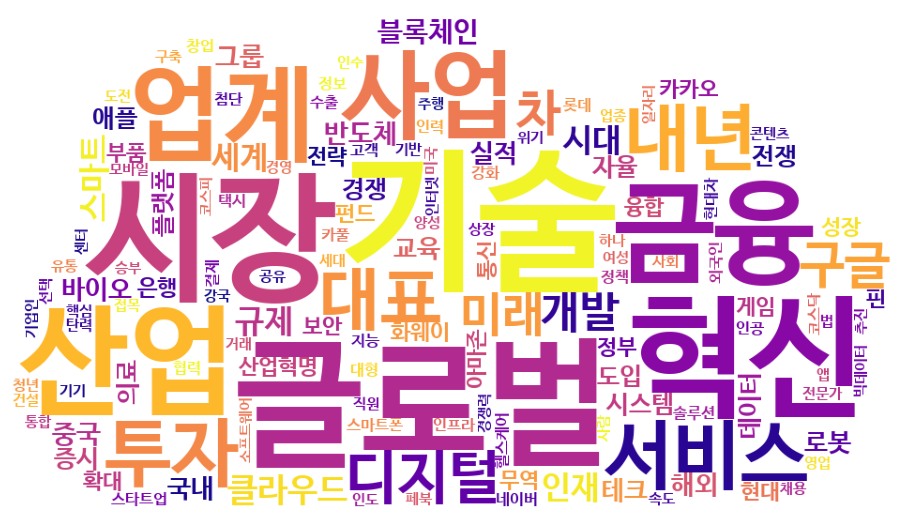

In [ ]:
# 2018년 it 워드 클라우드
wc = WordCloud(font_path = 'NanumBarunGothicBold', mask=mask, background_color='white', colormap='plasma')
cloud_2018 = wc.generate_from_frequencies(dict(tags_2018))
plt.figure(figsize=(16, 10))
plt.axis('off')
plt.imshow(cloud_2018)
plt.show()
cloud_2018.to_file('it2018.jpg')

In [ ]:
# plt.savefig('it2018.png', bbox_inches='tight') # 저장 X
cloud_2018.to_file('it2018.png') # 저장 O

### 2019년 it

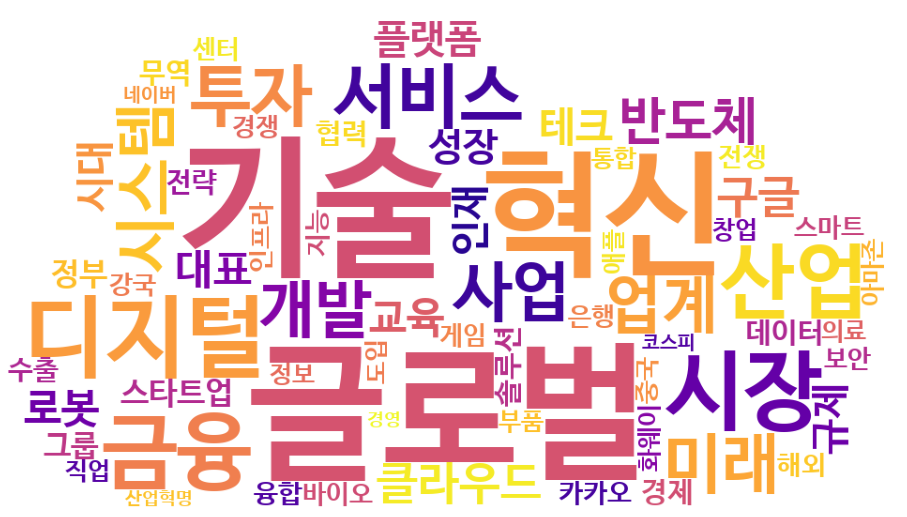

In [ ]:
cloud_2019 = wc.generate_from_frequencies(dict(tags_2019))
plt.figure(figsize=(16, 10))
plt.axis('off')
plt.imshow(cloud_2019)
plt.show()
cloud_2019.to_file('it2019.jpg')

### 2020년 it

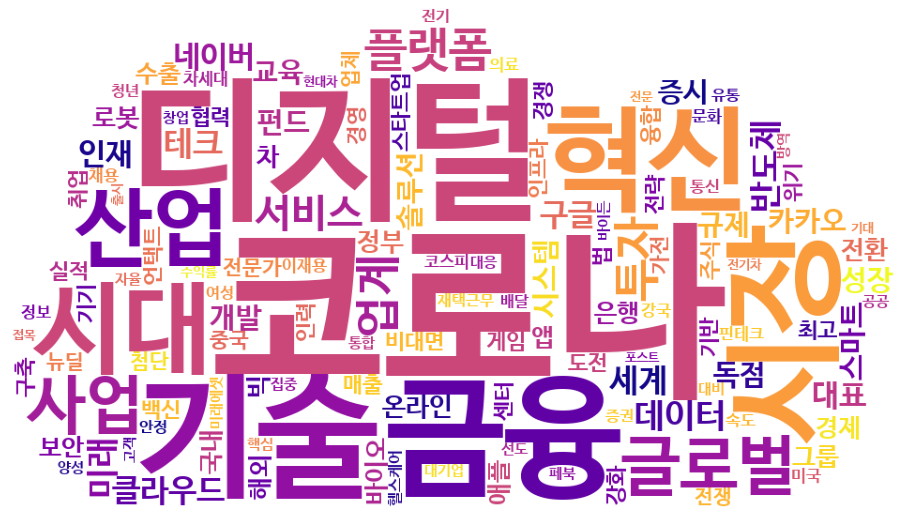

In [ ]:
cloud_2020 = wc.generate_from_frequencies(dict(tags_2020))
plt.figure(figsize=(16, 10))
plt.axis('off')
plt.imshow(cloud_2020)
plt.show()
cloud_2020.to_file('it2020.jpg')

### 2021년 it

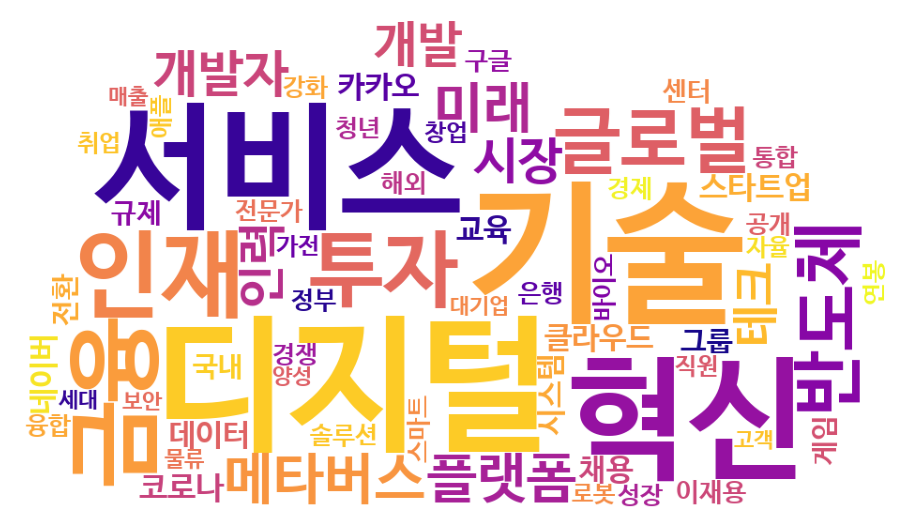

In [ ]:
cloud_2021 = wc.generate_from_frequencies(dict(tags_2021))
plt.figure(figsize=(16, 10))
plt.axis('off')
plt.imshow(cloud_2021)
plt.show()
cloud_2021.to_file('it2021.jpg')

### 2022년 it

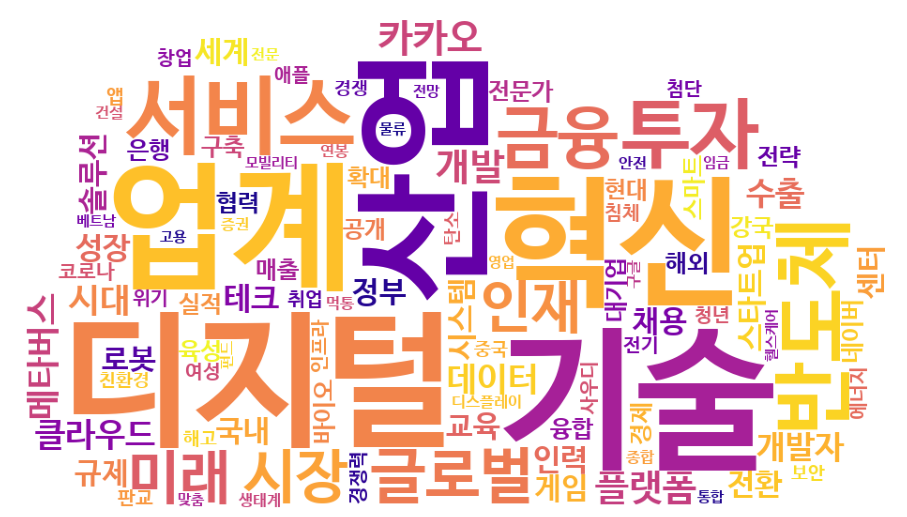

In [ ]:
cloud_2022 = wc.generate_from_frequencies(dict(tags_2022))
plt.figure(figsize=(16, 10))
plt.axis('off')
plt.imshow(cloud_2022)
plt.show()
cloud_2022.to_file('it2022.jpg')

## 워드클라우드 이미지 저장